In [2]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

# K Means

## 1. Explore

## 2. Build Model

In [3]:
bk = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burger-king-items.txt",
                sep='\t')

bk.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


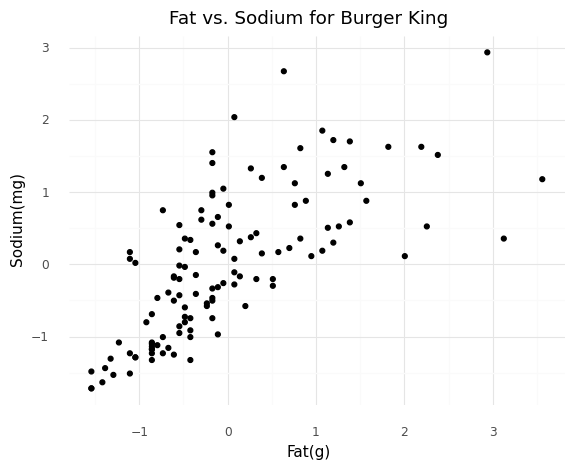

<ggplot: (335351278)>

In [4]:
# data
features = ["Fat(g)", "Sodium(mg)"]
X = bk[features]

# z
z = StandardScaler()

X[features] = z.fit_transform(X[features])

# plot

(ggplot(X, aes(x = "Fat(g)", y = "Sodium(mg)")) + geom_point() + theme_minimal() + labs(title = "Fat vs. Sodium for Burger King"))

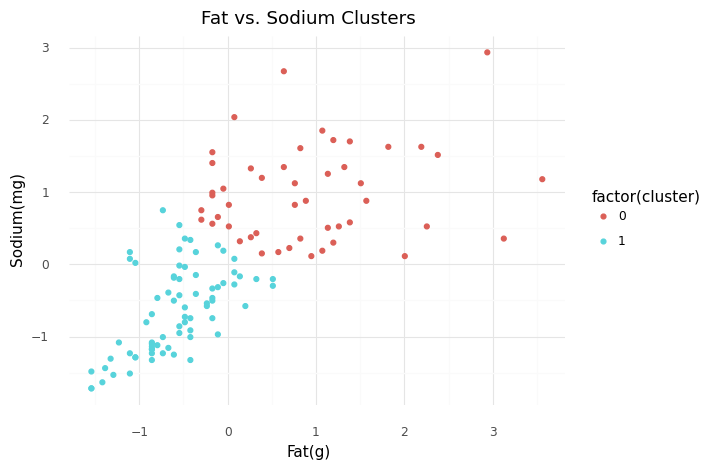

<ggplot: (337556718)>

In [5]:
# km
km = KMeans(n_clusters = 2)
km.fit(X)

# labels
membership = km.predict(X)

X["cluster"] = membership

X
# plot

(ggplot(X, aes(x = "Fat(g)", y = "Sodium(mg)", color = "factor(cluster)")) +
 geom_point() + theme_minimal() + labs(title = "Fat vs. Sodium Clusters"))

## 3. Evaluate Model

In [6]:
silhouette_score(X[features], membership)

0.4888133809282478

# Another Example

In [7]:
features = ["Fat(g)", "Sodium(mg)", "Calories", "Chol(mg)",
            "Sugar(g)", "Protein(g)"]

X = bk[features]

z = StandardScaler()

X[features] = z.fit_transform(X[features])

# model

km = KMeans(n_clusters = 5)
km.fit(X)

membership = km.predict(X)
X["cluster"] = membership

print(silhouette_score(X[features], membership))

0.2774126260919395


In [8]:
membership

array([1, 2, 2, 2, 2, 2, 2, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 1, 3,
       3, 0, 3, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 4, 4, 2,
       1, 1, 2, 2, 4, 4, 1, 1, 4, 4, 0, 0, 0, 2, 0, 0, 0, 2, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4], dtype=int32)

## Choosing K

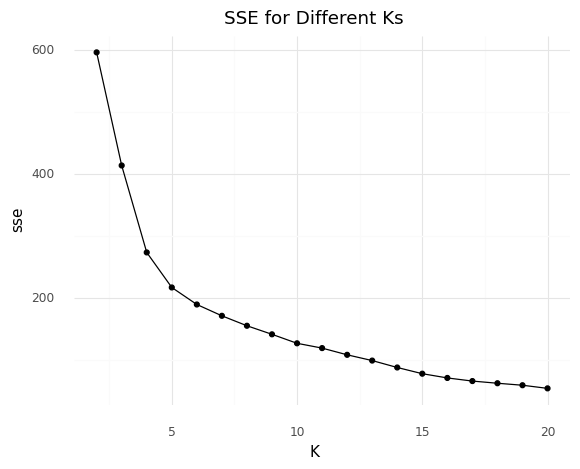

<ggplot: (337610397)>

In [9]:
ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

sse = []
sils = []



for k in ks:
    km = KMeans(n_clusters = k)
    km.fit(X)
    
    sse.append(km.inertia_)
    sils.append(silhouette_score(X, km.predict(X)))
    
sse_df = pd.DataFrame({"K": ks,
                      "sse": sse,
                      "silhouette": sils})

(ggplot(sse_df, aes(x = "K", y = "sse")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "SSE for Different Ks"))

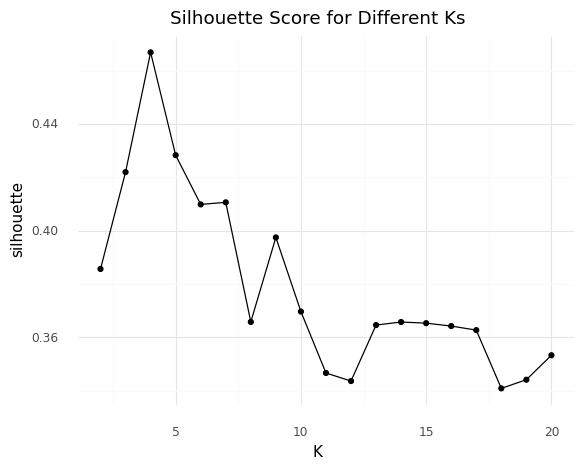

<ggplot: (337645761)>

In [10]:
# sil
(ggplot(sse_df, aes(x = "K", y = "silhouette")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette Score for Different Ks"))

# Another Another Example
Data from [here](https://www.kaggle.com/josephvm/major-league-soccer-dataset/version/51?select=all_players.csv).

In [11]:
d = "https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/all_players.csv"
mls = pd.read_csv(d)
mls.head()

,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,...,RdA,A/90min,FC,FS,OFF,YC,RC,SOG%,Year,Season
0,Roy Lassiter,TB,F,30,30,2580,27,4,76,49,...,2,0.14,20,39,70,2,0,64.47,1996,reg
1,Raul Diaz Arce,DC,F,28,28,2351,23,2,100,49,...,2,0.08,32,26,35,6,1,49.00,1996,reg
2,Eduardo Hurtado,LA,F,26,26,2323,21,7,87,56,...,3,0.27,48,26,25,5,0,64.37,1996,reg
3,Preki,KC,M,32,32,2880,18,13,140,61,...,4,0.41,26,44,7,3,0,43.57,1996,reg
4,Brian McBride,CLB,F,28,28,2307,17,3,79,44,...,1,0.12,21,46,10,0,0,55.70,1996,reg


In [12]:
mls2018 = mls.loc[mls.Year == 2018,]
mls2018.shape

(829, 28)

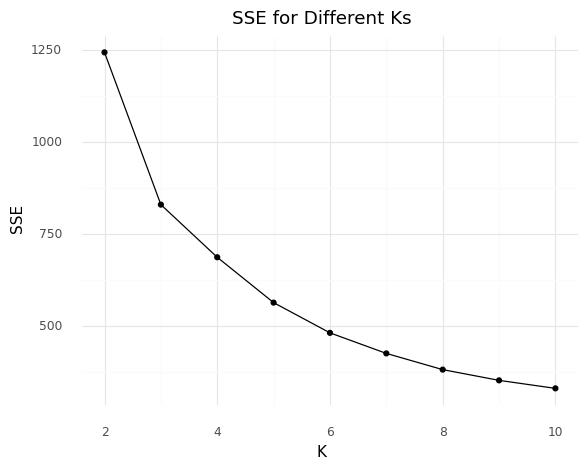

<ggplot: (337614252)>

In [13]:
pred = ["G", "A", "FC"]

ks = [2,3,4,5,6,7,8,9,10]
sse = []
sils = []

X = mls2018[pred]

z = StandardScaler()

X[pred] = z.fit_transform(X)

for k in ks:
    km = KMeans(n_clusters = k)
    km.fit(X)
    
    sse.append(km.inertia_)
    sils.append(silhouette_score(X, km.predict(X)))
    
sse_df = pd.DataFrame({"K": ks, "SSE": sse, "Silhouette": sils})
(ggplot(sse_df, aes(x = "K", y = "SSE")) + geom_point() + geom_line() + theme_minimal() +
labs(title = "SSE for Different Ks"))

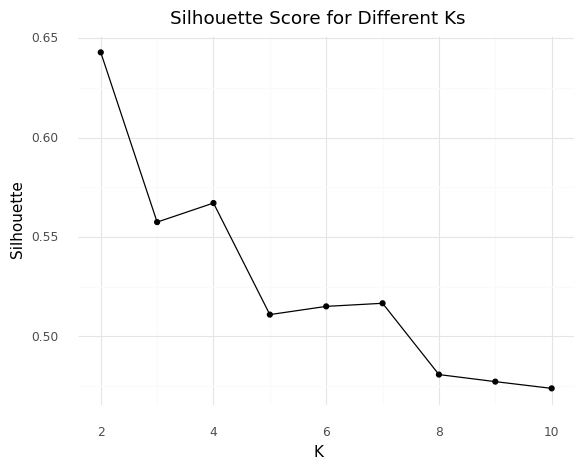

<ggplot: (337651008)>

In [14]:
(ggplot(sse_df, aes(x = "K", y = "Silhouette")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette Score for Different Ks"))

In [15]:
km = KMeans(n_clusters = 4)
km.fit(X)

mls2018["cluster"] = km.predict(X)
mls2018.head()

,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,...,A/90min,FC,FS,OFF,YC,RC,SOG%,Year,Season,cluster
8337,Josef Martinez,ATL,F,34,34,2898,31,6,97,56,...,0.19,24,31,35,1,0,57.73,2018,reg,3
8338,Zlatan Ibrahimovic,LA,F,27,24,2143,22,10,116,49,...,0.42,36,34,27,5,1,42.24,2018,reg,3
8339,Bradley Wright-Phillips,LAFC,F,32,28,2536,20,8,82,37,...,0.28,32,55,31,7,0,45.12,2018,reg,3
8340,Mauro Manotas,HOU,F,33,30,2633,19,1,95,43,...,0.03,24,20,23,1,0,45.26,2018,reg,3
8341,Gyasi Zardes,CLB,F,33,33,2948,19,0,88,40,...,0.00,27,33,20,3,0,45.45,2018,reg,3


## Summarize Clusters


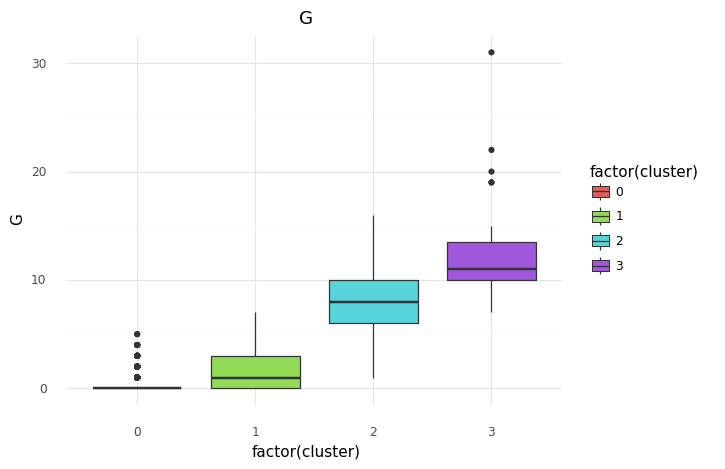

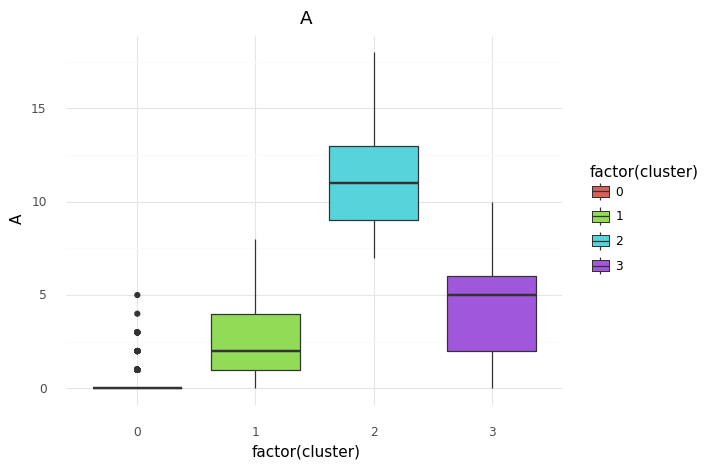

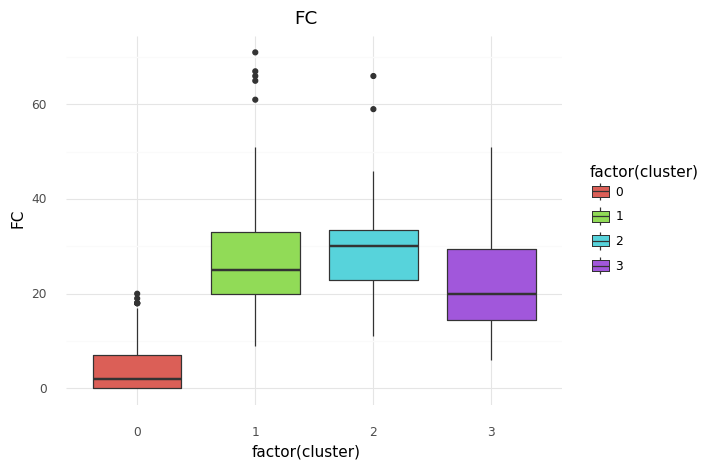

In [16]:
for p in pred:
    print(ggplot(mls2018, aes(x = "factor(cluster)", y = p,
                             fill = "factor(cluster)")) +
         geom_boxplot() + theme_minimal() + 
         labs(title = p))

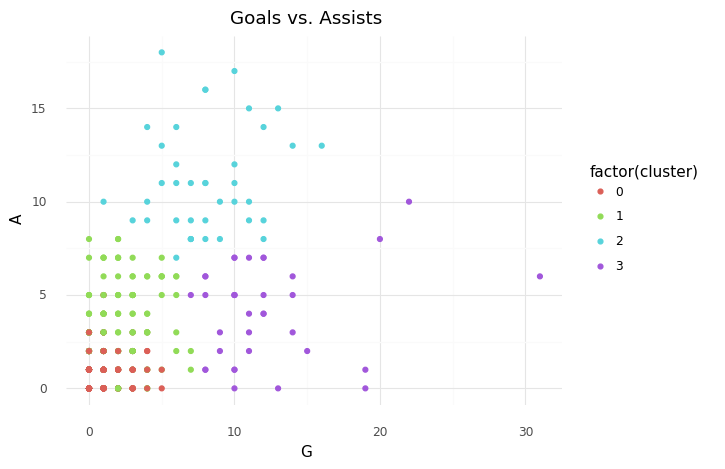

<ggplot: (344203704)>

In [17]:
(ggplot(mls2018, aes(x = "G", y = "A", color = "factor(cluster)")) + 
geom_point() + theme_minimal() + labs(x = "G", y = "A", title = "Goals vs. Assists"))

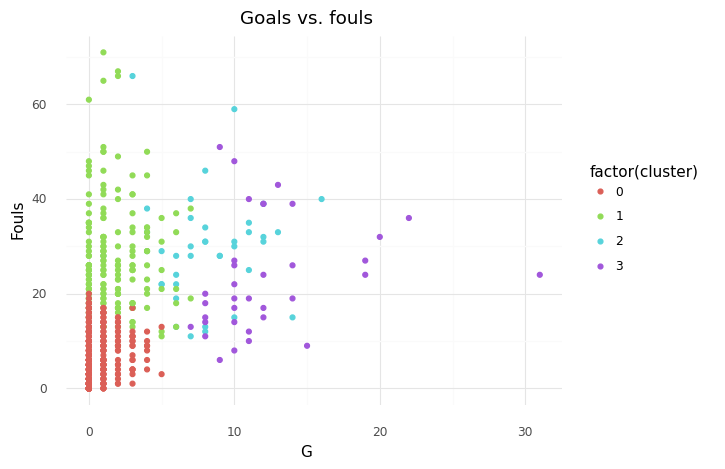

<ggplot: (344095729)>

In [18]:
(ggplot(mls2018, aes(x = "G", y = "FC", color = "factor(cluster)")) + 
geom_point() + theme_minimal() + labs(x = "G", y = "Fouls", title = "Goals vs. fouls"))

In [19]:
mls2018.groupby("cluster").mean()[["G", "A", "FC"]]

,G,A,FC
cluster,,,
0,0.367596,0.331010,4.268293
1,1.679558,2.635359,27.535912
2,8.051282,11.179487,29.717949
3,12.285714,4.114286,23.514286


In [20]:
mls2018.loc[mls2018.cluster == 3,"Player"].sample(10)

8387              Diego Rubio
8363    Ismael Tajouri-Shradi
8347               Ola Kamara
8361            Daniel Salloi
8340            Mauro Manotas
8349                Dom Dwyer
8357             Danny Hoesen
8355         Aleksandar Katai
8373                     Vako
8397               Will Bruin
Name: Player, dtype: object

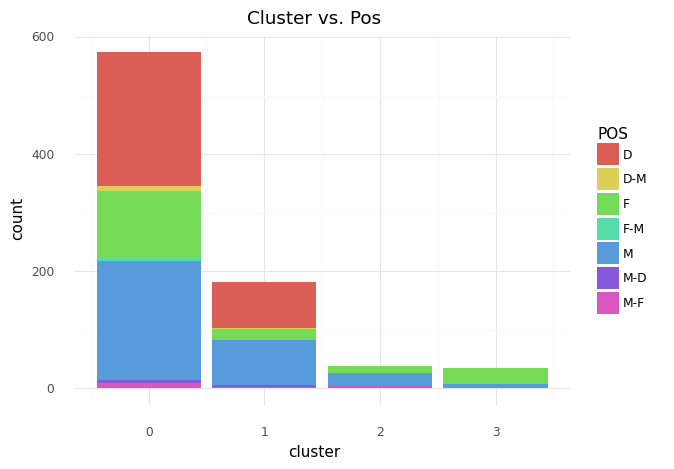

<ggplot: (344286007)>

In [21]:
(ggplot(mls2018, aes(x = "cluster", fill = "POS")) + geom_bar() + theme_minimal() + labs(title = "Cluster vs. Pos"))

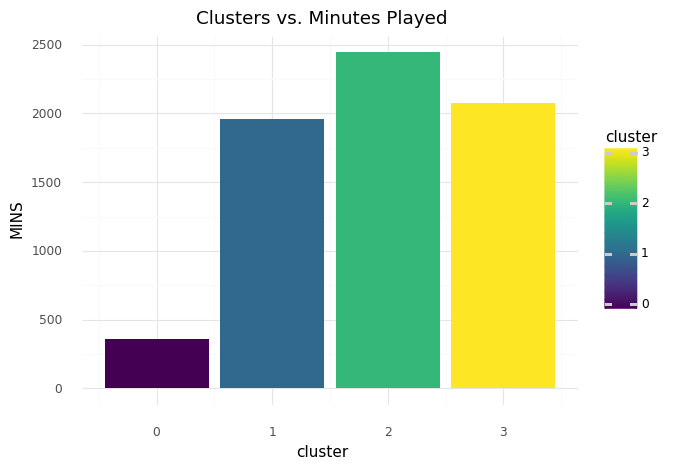

<ggplot: (344152498)>

In [22]:
(ggplot(mls2018, aes(x = "cluster", y = "MINS", fill = "cluster")) +
 stat_summary(fun_data = "mean_sdl", geom = "bar") +
theme_minimal() + labs(title = "Clusters vs. Minutes Played"))